In [2]:
from pref_voting.dominance_axioms import condorcet_winner, condorcet_loser, pareto_dominance

from pref_voting.voting_methods import *
from pref_voting.generate_profiles import *
from pref_voting.voting_methods_registry import voting_methods
from pref_voting.generate_weighted_majority_graphs import *
from pref_voting.helper import *
from pref_voting.mappings import *  
from tqdm.notebook import tqdm
from pref_voting.axioms import *
import pickle

+---+---+---+
| 3 | 3 | 1 |
+---+---+---+
| a | b | c |
| b | c | a |
| c | a | b |
+---+---+---+


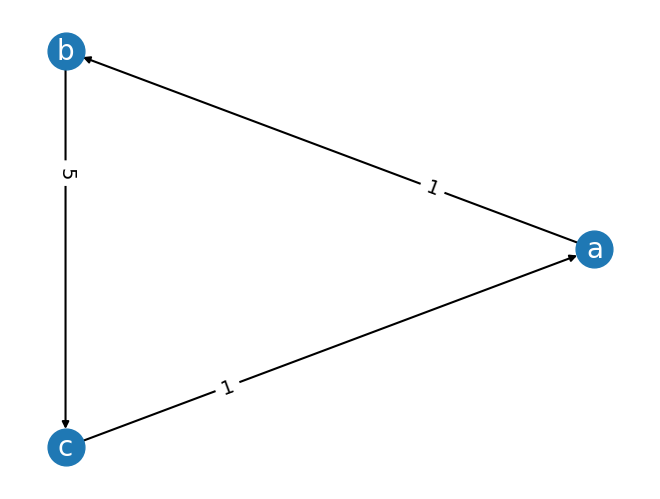

The margin of $$a$$ over $$b$$ is $$1$$, not $$3$$
The margin of $$b$$ over $$c$$ is $$5$$, not $$3$$
The margin of $$c$$ over $$a$$ is $$1$$, not $$1$$


In [34]:
a=0
b=1
c=2
prof = Profile([
    [a, b, c],
    [a, c, b],
    [b, a, c],
    [b, c, a],
    [c, a, b],
    [c, b, a],
 ], 
 rcounts=[
     3, #abc 
     0, #acb
     0, #bac
     3, #bca
     1, #cab
     0  #cba
 ],
 cmap = {a: 'a', b: 'b', c: 'c'})

prof.anonymize().display()

prof.display_margin_graph()

print(f"The margin of $$a$$ over $$b$$ is $${prof.margin(a, b)}$$, not $$3$$")
print(f"The margin of $$b$$ over $$c$$ is $${prof.margin(b, c)}$$, not $$3$$")
print(f"The margin of $$c$$ over $$a$$ is $${prof.margin(c, a)}$$, not $$1$$")

In [ ]:
cw_vms = voting_methods.filter(violates=["condorcet_winner"], election_types=[ElectionTypes.PROFILE])

print(len(cw_vms))
for vm in cw_vms: 
    print(vm)

In [ ]:
all_num_cands = [3, 4, 5]
all_num_voters = [2, 3, 4, 5, 6, 7, 8, 9]
axiom = "condorcet_winner"
axiom_params = {
    "only_resolute": True,
}
vms_to_skip = [iterated_removal_cl, pareto, superior_voting]
ax = axioms_dict[axiom]
for vm in cw_vms:
    if vm in vms_to_skip:
        continue
    print(vm)
    found_it = False
    vm_name = vm.name.replace(" ", "_")
    filename= f"./pref_voting/data/examples/{axiom}/minimal_resolute_{vm_name}.soc"

    if os.path.exists(filename):
        print(f"Skipping {vm} because {filename} already exists")
        continue
    for num_cands in tqdm(all_num_cands): 
        for num_voters in tqdm(all_num_voters): 
            for _prof in enumerate_anon_profile(num_cands, num_voters): 
                prof = _prof.anonymize()
                if ax.has_violation(prof, vm, **axiom_params): 
                    print(f"Found a profile that violates {axiom} for {vm} with {num_cands} candidates and {num_voters} voters") 
                    # remove spaces in vm name
                    vm_name = vm.name.replace(" ", "_")
                    filename= f"./pref_voting/data/examples/{axiom}/minimal_resolute_{vm_name}.soc"
                    prof.write(filename)
                    found_it = True
                    break
            if found_it:
                break
        if found_it:
            break


In [ ]:
all_num_cands = [3, 4, 5]
all_num_voters = [2, 3, 4, 5, 6, 7, 8, 9]
axiom = "condorcet_winner"
axiom_params = {
    "only_resolute": False,
}
vms_to_skip = []
ax = axioms_dict[axiom]
for vm in cw_vms:
    if vm in vms_to_skip:
        continue
    print(vm)
    found_it = False
    for num_cands in tqdm(all_num_cands): 
        for num_voters in tqdm(all_num_voters): 
            for _prof in enumerate_anon_profile(num_cands, num_voters): 
                prof = _prof.anonymize()
                if ax.has_violation(prof, vm, **axiom_params): 
                    print(f"Found a profile that violates {axiom} for {vm} with {num_cands} candidates and {num_voters} voters") 
                    # remove spaces in vm name
                    vm_name = vm.name.replace(" ", "_")
                    filename= f"./pref_voting/data/examples/{axiom}/minimal_{vm_name}.soc"
                    prof.write(filename)
                    found_it = True
                    break
            if found_it:
                break
        if found_it:
            break
